### Set Params

In [1]:
import sys
import nltk
import gensim
import time
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle
# from helpers import *
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import lightgbm as lgb
from sklearn import metrics
import os
from matplotlib import pyplot as plt
from nltk.stem.porter import *
from googletrans import Translator
from joblib import parallel_backend # added line.
from ray.util.joblib import register_ray # added line.
#from tune_sklearn import TuneGridSearchCV

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV,HalvingGridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report


from xgboost import XGBClassifier
from sklearn import svm
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize,pos_tag

from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

from joblibspark import register_spark



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
column_to_predict = "Assignmentgroup"
# Supported datasets:
# ticket_type
# business_service
# category
# impact
# urgency
# sub_category1
# sub_category2

classifier = "LR"  # Supported algorithms # "SVM" # "NB"
use_grid_search = True  # grid search is used to find hyperparameters. Searching for hyperparameters is time consuming
remove_stop_words = False  # removes stop words from processed text
output_format = "string"
mode = 'tfidf'
stop_words_lang = 'english'  # used with 'remove_stop_words' and defines language of stop words collection
use_stemming = False  # word stemming using nltk
fit_prior = True  # if use_stemming == True then it should be set to False ?? double check
min_data_per_class = 1  # used to determine number of samples required for each class.Classes with less than that will be excluded from the dataset. default value is 1

## Importing Ticket Details

In [65]:
dfTickets = pd.read_excel(r'D:\datascience\support_ticket_classification\incident_test.xlsx',engine='openpyxl')
dfTickets.head(50)

,Number,Priority,State,Assignment group,Assigned to,Description,Close code,Close notes,Opened,Resolved,...,Category,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time
0,INC0917534,4 - Low,Closed,PAN RCI INDIA CAB,NaN,Please route to IRF should be routed to the RC...,NaN,Closing as this will be handled by either prod...,2019-04-01 17:33:08,2019-07-16 16:10:23,...,Incident,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435
1,INC0174710,3 - Moderate,Closed,PAN RCI NA NP CAB,NaN,EVR Account Page Layout Change Set needs to be...,Backed Out Change,Created an Incident insted of a change request...,2017-04-26 10:42:42,2017-04-26 12:27:15,...,Infrastructure,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273
2,INC1219770,3 - Moderate,Closed,RCI Affiliate Reporting,NaN,Caller: Yamila Heavy\nContact Phone: (407) 597...,NaN,issue fixed,2020-01-12 15:22:10,2020-04-03 16:15:06,...,Request,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376
3,INC0410026,4 - Low,Closed,RCI Affiliate Reporting,NaN,"Greetings,\nExternal Portal users are getting ...",NaN,This Incident has been closed due to age and l...,2017-11-01 11:17:22,2019-07-16 14:30:35,...,Incident,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393
4,INC1192111,4 - Low,Closed,RCI Affiliate Reporting,NaN,Caller: Remy Delacruz-RU249101\nContact Phone:...,NaN,issue fixed,2019-12-10 15:12:35,2020-04-03 15:58:31,...,Request,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156
5,INC0118353,3 - Moderate,Closed,RCI Affiliate Reporting,NaN,User is not able to pull a report from reporti...,NaN,NaN,2017-03-09 13:03:31,2021-04-07 01:56:50,...,Software/Application,4-Minor/Localized,2-High,False,NaN,NaT,True,1,0,128692399
6,INC0067268,3 - Moderate,Closed,RCI Affiliate Reporting,NaN,(please respond to user RU053709 listed email ...,No Action Taken,This Incident has been closed due to age and l...,2017-01-12 03:35:44,2019-07-16 13:16:18,...,Incident,3-Moderate/Limited,3-Medium,False,NaN,NaT,True,4,0,79087234
7,INC0874576,4 - Low,Closed,RCI Affiliate Reporting,NaN,"ru260505\nMorino, Tomoko\nUser called in for a...",NaN,This Incident has been closed due to age and l...,2019-02-22 13:41:02,2019-07-16 14:49:04,...,Incident,3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,12442082
8,INC1186600,4 - Low,Closed,RCI Affiliate Reporting,NaN,This e-mail is from an external source. Use c...,NaN,issue fixed,2019-12-04 16:35:37,2020-04-02 15:29:14,...,Incident,3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,10360417
9,INC0874718,4 - Low,Closed,RCI Affiliate Reporting,NaN,Good morning\n\nPlease open a ticket for below...,NaN,This ticket was assigned to RCI reporting team...,2019-02-22 15:01:07,2019-03-13 14:18:12,...,Request,4-Minor/Localized,3-Medium,False,NaN,NaT,True,3,0,1635425


## Exploratory Data Analysis

In [66]:
dfTickets.shape

(192308, 26)

There are almost 2.3 lakhs of ticket data and 18 feature columns . 
We need to analyze each one the feature column to understand whether these columns are required for our modeling

In [67]:
dfTickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192308 entries, 0 to 192307
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Number              192308 non-null  object        
 1   Priority            192308 non-null  object        
 2   State               192308 non-null  object        
 3   Assignment group    192308 non-null  object        
 4   Assigned to         162678 non-null  object        
 5   Description         192203 non-null  object        
 6   Close code          147265 non-null  object        
 7   Close notes         176450 non-null  object        
 8   Opened              192308 non-null  datetime64[ns]
 9   Resolved            192308 non-null  datetime64[ns]
 10  Resolved by         192261 non-null  object        
 11  Severity            192308 non-null  object        
 12  Closed              192308 non-null  datetime64[ns]
 13  Closed by           175354 no

Lets understand each one of the feature column and decide whether its required to create our ML model.
Number :- Incident Number 
Priority :- Priority of the ticket 1 to 4 . 1 being more prioritized
State:- Status of the ticket
Assignment Group :- Group where it is assigned
Assigned To :- Person whom the ticket is being assigned in the group

#### Our target column will be 1. Assigned group and 2. Severity/Priority

In [61]:
dfTickets.isna().sum().to_frame() #Checking null values

,0
Number,0
Priority,0
State,0
Assignment group,0
Assigned to,29630
Description,105
Close code,45043
Close notes,15858
Opened,0
Resolved,0


Assign to , Close code , Closed and Closed by have null/zero values. However these columns will not be required to find the TARGET coulmn

#### Checking duplicate tickets by number

In [68]:
sum(dfTickets['Number'].value_counts()>1) 

0

There are no duplicate tickets 

#### Dropping less important features 

In [69]:
# Remove redundant columns 
#dfTickets = dfTickets.drop(['Number'], axis = 1) 
dfTickets =dfTickets.drop(['State'], axis = 1) 
dfTickets =dfTickets.drop(['Assigned to'], axis = 1) 
dfTickets =dfTickets.drop(['Close code'], axis = 1) 
dfTickets =dfTickets.drop(['Close notes'], axis = 1) 
dfTickets =dfTickets.drop(['Resolved'], axis = 1) 
#dfTickets =dfTickets.drop(['Opened'], axis = 1) 
dfTickets =dfTickets.drop(['Closed'], axis = 1) 
dfTickets =dfTickets.drop(['Closed by'], axis = 1) 
dfTickets =dfTickets.drop(['Resolved by'], axis = 1) 
#dfTickets =dfTickets.drop(['Caller'], axis = 1) 
dfTickets =dfTickets.drop(['Incident Type'], axis = 1)

In [70]:
# Remove redundant columns 
dfTickets =dfTickets.drop(['Priority'], axis = 1) 
dfTickets =dfTickets.drop(['Opened'], axis = 1) 
dfTickets =dfTickets.drop(['Severity'], axis = 1) 
dfTickets =dfTickets.drop(['Configuration item'], axis = 1) 
dfTickets =dfTickets.drop(['Category'], axis = 1)

#### Lets review 50 data now

In [71]:
dfTickets.head(20)

,Number,Assignment group,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time
0,INC0917534,PAN RCI INDIA CAB,Please route to IRF should be routed to the RC...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435
1,INC0174710,PAN RCI NA NP CAB,EVR Account Page Layout Change Set needs to be...,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273
2,INC1219770,RCI Affiliate Reporting,Caller: Yamila Heavy\nContact Phone: (407) 597...,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376
3,INC0410026,RCI Affiliate Reporting,"Greetings,\nExternal Portal users are getting ...",4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393
4,INC1192111,RCI Affiliate Reporting,Caller: Remy Delacruz-RU249101\nContact Phone:...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156
5,INC0118353,RCI Affiliate Reporting,User is not able to pull a report from reporti...,4-Minor/Localized,2-High,False,NaN,NaT,True,1,0,128692399
6,INC0067268,RCI Affiliate Reporting,(please respond to user RU053709 listed email ...,3-Moderate/Limited,3-Medium,False,NaN,NaT,True,4,0,79087234
7,INC0874576,RCI Affiliate Reporting,"ru260505\nMorino, Tomoko\nUser called in for a...",3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,12442082
8,INC1186600,RCI Affiliate Reporting,This e-mail is from an external source. Use c...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,10360417
9,INC0874718,RCI Affiliate Reporting,Good morning\n\nPlease open a ticket for below...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,3,0,1635425


#### Renaming feature group for easier understanding

In [72]:
dfTickets = dfTickets.rename(columns={'Assignment group': 'Assignmentgroup'})

In [73]:
dfTickets.head()

,Number,Assignmentgroup,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time
0,INC0917534,PAN RCI INDIA CAB,Please route to IRF should be routed to the RC...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435
1,INC0174710,PAN RCI NA NP CAB,EVR Account Page Layout Change Set needs to be...,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273
2,INC1219770,RCI Affiliate Reporting,Caller: Yamila Heavy\nContact Phone: (407) 597...,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376
3,INC0410026,RCI Affiliate Reporting,"Greetings,\nExternal Portal users are getting ...",4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393
4,INC1192111,RCI Affiliate Reporting,Caller: Remy Delacruz-RU249101\nContact Phone:...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156


In [74]:
dfTickets.tail()

,Number,Assignmentgroup,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time
192303,INC1527303,WVC Application L1 Support,"Agrawalla, Sulav\nMon 2/1/2021 10:53 PM\nHi Te...",3-Moderate/Limited,3-Medium,False,NaN,NaT,True,0,0,367
192304,INC1332394,WVC Application L1 Support,Caller: Amy Whittaker\nContact Phone: (417) 53...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,2,0,85911
192305,INC1737827,WVC Application L1 Support,Kindly Delete an account for WVO CACS NA\n\nUs...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,0,0,679
192306,INC1606637,WVC Application L1 Support,Caller: Velicea Baugh-Gregg\nContact Phone: (4...,2-Significant/Large,3-Medium,False,NaN,NaT,True,1,0,6108
192307,INC1413268,WVC Application L1 Support,Caller: Sharon Kitchen\nContact Phone: (407)...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,81739


In [77]:
df_Tickets_new = dfTickets.copy()

#### Understand Description - Column of interest

In [78]:
df_Tickets_new['Description'].head(50)

0     Please route to IRF should be routed to the RC...
1     EVR Account Page Layout Change Set needs to be...
2     Caller: Yamila Heavy\nContact Phone: (407) 597...
3     Greetings,\nExternal Portal users are getting ...
4     Caller: Remy Delacruz-RU249101\nContact Phone:...
5     User is not able to pull a report from reporti...
6     (please respond to user RU053709 listed email ...
7     ru260505\nMorino, Tomoko\nUser called in for a...
8     This e-mail is from an external source.  Use c...
9     Good morning\n\nPlease open a ticket for below...
10    This has not been resolved. Please reopen the ...
11    User is unable to pull the data from their RCI...
12    HI\n\nPlease see below\nRDT are  trying to dup...
13    Greetings \n \nFor the user:\n \nAdriana.River...
14    Caller: Kyo Keum\nContact Phone: (425) 498-780...
15    User is unable to log in to evs1 section. Givi...
16    I am seeking assistance from someone who will ...
17    Caller: ru203311 Maurath, Carol\nContact P

In [79]:
df_Tickets_new['Description'][8760]

'OVEit Central could not find the RCI_MKTG_POINTS_DAILY_FEEDS_COMPLETE.IND file on the RCIINDETLP01 ETL server.  This is a daily job that runs at 9:30 pm EST, except for Saturday.   The job runs every 30 minutes between 9:30 pm EST and 10:30 pm EST until first success.\n\nAfter MOVEit Central makes sure that the RCI_MKTG_POINTS_DAILY_FEEDS_COMPLETE.IND file is available on the ETL system, it gets all other files, encrypts those using Merkle\'s public encryption key then uploads to Merkle Secure FTP server (xfer01.merkleinc.com).\n\nEUS, \'Customer Marketing files haven\'t been delivered to Merkle\'. If\nthis alert message is received between 10:30 pm EST to 10:59 pm EST\nduring weekdays and between 4:00 am EST and 4:29 am EST, open a Priority 2 Incident and assign it to RCI WEB ETL APP. Also please engage \'RCI WEB ETL APP\' On-Call person for immediate resolution.\n\n \nOnly after Customer Marketing files get put on the RCIINDETLP01 server, Wyndham End User Support Service Desk needs 

In [80]:
df_Tickets_new['Description'][10000]

'This e-mail is from an external source. Use caution when opening attachments or clicking on links.\n________________________________\n\nHi Team,\n\nPLEASE ASSIGN THIS LOG TO THE RCI JOB FAILURE INBOX\n\nThe following Jobs have abended on RCI and need ASSIST Numbers:\n\n\nCritical=NO\n\nJob RSMW1920 abended at step RSMW901D with S000\n\nTkt # : IN11437981\n\n\n\nThanks & Regards\nWyndham Mainframe Operations,\nIBM India Pvt Ltd,\n(866) 656-9621, option 1 _ option 2.'

In [81]:
df_Tickets_new['Description'][50000]

'OEM_usfldba1.wst.corproot.com_DWHSPRD_DWHSPRD2_alertLog:genericErrStack_ORA-error stack (10,173) logged in /opt/oracle/orabase/diag/rdbms/dwhsprd/DWHSPRD2/trace/alert_DWHSPRD2.log.'

Observations:

	1. PCI and PII information present
	2. Email header and footer present
	3. Signature preset 
	4. Removing links, special characters
	5. @user present
	6. Special characters, numbers, punctuations present
    7. Phone number present 
    8. Image tagging present
    9. Email to and sent is there 


Number of words for each assignment group 

In [82]:
df_Tickets_new['word_count'] = df_Tickets_new['Description'].apply(lambda x: len(str(x).split(" ")))

Number of characters

In [83]:
df_Tickets_new['char_count'] = df_Tickets_new['Description'].str.len() ## this also includes spaces

In [84]:
df_Tickets_new.head(50)

,Number,Assignmentgroup,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time,word_count,char_count
0,INC0917534,PAN RCI INDIA CAB,Please route to IRF should be routed to the RC...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435,136,919.0
1,INC0174710,PAN RCI NA NP CAB,EVR Account Page Layout Change Set needs to be...,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273,36,197.0
2,INC1219770,RCI Affiliate Reporting,Caller: Yamila Heavy\nContact Phone: (407) 597...,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376,52,388.0
3,INC0410026,RCI Affiliate Reporting,"Greetings,\nExternal Portal users are getting ...",4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393,17,165.0
4,INC1192111,RCI Affiliate Reporting,Caller: Remy Delacruz-RU249101\nContact Phone:...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156,155,969.0
5,INC0118353,RCI Affiliate Reporting,User is not able to pull a report from reporti...,4-Minor/Localized,2-High,False,NaN,NaT,True,1,0,128692399,24,138.0
6,INC0067268,RCI Affiliate Reporting,(please respond to user RU053709 listed email ...,3-Moderate/Limited,3-Medium,False,NaN,NaT,True,4,0,79087234,364,2269.0
7,INC0874576,RCI Affiliate Reporting,"ru260505\nMorino, Tomoko\nUser called in for a...",3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,12442082,13,85.0
8,INC1186600,RCI Affiliate Reporting,This e-mail is from an external source. Use c...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,0,0,10360417,200,1375.0
9,INC0874718,RCI Affiliate Reporting,Good morning\n\nPlease open a ticket for below...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,3,0,1635425,338,2184.0


#### Data Cleaning

#### Remove Email Footer,greetings and Company Address

emailfooter_a  = "This email message (including all attachments) is for the sole use of the intended recipient(s) and may contain confidential information. If you are not the intended recipient, please contact the sender by reply email and destroy all copies of the original message. Unless otherwise indicated in the body of this email, nothing in this communication is intended to operate as an electronic signature and this transmission cannot be used to form, document, or authenticate a contract. Wyndham Worldwide Corporation and/or its affiliates may monitor all incoming and outgoing email communications in the United States, including the content of emails and attachments, for security, legal compliance, training, quality assurance and other purposes."
emailfooter_b = "If you are not the intended recipient, be advised that any unauthorized review, disclosure, copying, distribution or use of this information, or any action taken or omitted to be taken in reliance on it, is prohibited and may be unlawful. Please notify the sender immediately if you have received this electronic message by mistake, and destroy all copies of the original message.."
emailfooter_c = "The information in this electronic mail ('e-mail') message may contain information that is confidential and/or privileged, or may otherwise be protected by work product or other legal rules. It is solely for the use of the individual(s) or the entity(ies) originally intended.  Access to this electronic mail message by anyone else is unauthorized."
emailfooter_d = "The sender believes that this e-mail and any attachments were free of any virus, worm, Trojan horse, malicious code and/or other contaminants when sent. E-mail transmissions cannot be guaranteed to be secure or error-free, so this message and its attachments could have been infected, corrupted or made incomplete during transmission. By reading the message and opening any attachments, the recipient accepts full responsibility for any viruses or other defects that may arise, and for taking remedial action relating to such viruses and other defects. Neither Wyndham Worldwide Corporation nor any of it's affiliated entities is liable for any loss or damage arising in any way from, or for errors or omissions in the contents of, this message or its attachments."
greetings =['Good afternoon','Good morning']
addressess = ['Wyndham Vacation Ownership','6277 Sea Harbor Dr','Orlando, FL 32821','Thanks']

def remove_email_content(description):
        #print(description)
        try:
            if description==description:
                description = description.replace(emailfooter_a, "")
                description = description.replace(emailfooter_b, "")
                description = description.replace(emailfooter_c, "")
                description = description.replace(emailfooter_d, "")
                for greeting in greetings:
                    description  = description.replace(greeting, "")
                for addresses in addressess:
                    description = description.replace(addresses, "")
        except:
            print("Error occured")
        return description

In [85]:
def remove_email_content(emailString):
        if emailString==emailString:
            footer = ["the information in this electronic mail", "this email message"] # A list containing email footers :: Keep all word in lower case
            # Split your email by line breaks and make everything lowercase
            emailLines = emailString.lower().split("\n")
            normalLines = emailString.split("\n")

            # Start and end points to extract the text
            start = -1
            end = len(emailLines) - 1
            containCnt = 0

            for i in range(len(emailLines)):
                line  = emailLines[i]

                # Check if any footer in this line
                if len([s for s in footer if s in line]) and end == len(emailLines) - 1:
                    containCnt = containCnt + 1

                if len([s for s in footer if s in line]) and end == len(emailLines) - 1:
                    end = i
                    break

            #Only footer is present        
            if end == 0 and containCnt > 0:
                return "\n"
            #Single line with no footer
            if end == 0 or containCnt == 0:
                return "\n".join(normalLines[:end+1])
            else:
                return "\n".join(normalLines[:end])
        else:
             return emailString


In [86]:
df_Tickets_new['Cleaned_Description'] = df_Tickets_new['Description'].apply(remove_email_content)

In [87]:
df_Tickets_new.shape

(192308, 15)

In [88]:
df_Tickets_new.head(5)

,Number,Assignmentgroup,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time,word_count,char_count,Cleaned_Description
0,INC0917534,PAN RCI INDIA CAB,Please route to IRF should be routed to the RC...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435,136,919.0,Please route to IRF should be routed to the RC...
1,INC0174710,PAN RCI NA NP CAB,EVR Account Page Layout Change Set needs to be...,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273,36,197.0,EVR Account Page Layout Change Set needs to be...
2,INC1219770,RCI Affiliate Reporting,Caller: Yamila Heavy\nContact Phone: (407) 597...,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376,52,388.0,Caller: Yamila Heavy\nContact Phone: (407) 597...
3,INC0410026,RCI Affiliate Reporting,"Greetings,\nExternal Portal users are getting ...",4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393,17,165.0,"Greetings,\nExternal Portal users are getting ..."
4,INC1192111,RCI Affiliate Reporting,Caller: Remy Delacruz-RU249101\nContact Phone:...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156,155,969.0,Caller: Remy Delacruz-RU249101\nContact Phone:...


Taking a look into columns with email information

#### Removing Punctuations and Special Characters

This function will  
    
    1. Move from upper case to lower case
    2. Removed email
    3. Removed numbers
    4. Remove new line charracter
    5. Remove hashtag
    6. Remove HTML Special entities
    7. Remove hyperlinks
    8. Remove any unreadable characters
    9. Remove any special character
    10.Remove any URL

In [58]:
def clean_data(text):  
    if text==text:
        #text=text.lower()
        text = re.sub(r"received from:",' ',text)
        text = re.sub(r"from:",' ',text)
        text = re.sub(r"to:",' ',text)
        text = re.sub(r"subject:",' ',text)
        text = re.sub(r"sent:",' ',text)
        text = re.sub(r"ic:",' ',text)
        text = re.sub(r"cc:",' ',text)
        text = re.sub(r"bcc:",' ',text)
        #Remove email 
        text = re.sub(r'\S*@\S*\s?', '', text)
        # Remove numbers 
        text = re.sub(r'\d+','' ,text)
        # Remove Non Dictionary character-TODO
        # Remove new line characters 
        text = re.sub(r'\n',' ',text)
        # Remove hashtag while keeping hashtag text
        text = re.sub(r'#','', text)
        #& 
        text = re.sub(r'&;?', 'and',text)
        # Remove HTML special entities (e.g. &amp;)
        text = re.sub(r'\&\w*;', '', text)
        # Remove hyperlinks
        text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
        # Remove characters beyond Readable formart by Unicode:
        text= ''.join(c for c in text if c <= '\uFFFF') 
        text = text.strip()
        # Remove unreadable characters  (also extra spaces)
        text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
        # Remove special character
        input_txt=text
        input_txt = input_txt.replace("won't", "will not")
        input_txt = input_txt.replace("cannot", "can not")
        input_txt = input_txt.replace("can't", "can not")
        input_txt = input_txt.replace("n't", " not")
        input_txt = input_txt.replace("what's", "what is")
        input_txt = input_txt.replace("it's", "it is")
        input_txt = input_txt.replace("'ve", " have")
        input_txt = input_txt.replace("i'm", "i am")
        input_txt = input_txt.replace("'re", " are")
        input_txt = input_txt.replace("he's", "he is")
        input_txt = input_txt.replace("she's", "she is")
        input_txt = input_txt.replace("'s", " own")
        input_txt = input_txt.replace("%", " percent ")
        input_txt = input_txt.replace("'ll", " will")
        ##--remove url
        input_txt = re.sub(r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b", " IP ",input_txt)
        ##--remove URL
        input_txt = re.sub(r"(hxxp?|https|http)\S+", "URL",  input_txt)
        ##--remove the number
        input_txt = re.sub(r"[0-9]+", ' ', input_txt)
        if input_txt == ' ':
            input_txt =''
        special_char = '@_!#$%^&*()<>?/\|}{~:;[]-=,'
        for i in special_char:
            input_txt = input_txt.replace(i, ' ')
        return input_txt
    else:
        return text

In [90]:
df_Tickets_new['Cleaned_Description'] = df_Tickets_new['Cleaned_Description'].apply(clean_data)

Lets look into the description of the data after cleaning 

In [91]:
row = 99
for var in list(range(5)):
  print("Description :::")
  print(df_Tickets_new['Description'][row+var])

Description :::
Caller: Adam Swirzewski
Contact Phone: (865) 436-4367
Host Name / IP Address: LC-LTGM/10.53.253.254
Available hours: 2 to 8 PM
Time zone: eastern std
Works at (Home/Office): office
Detailed description: The user Adam Swirzewski - RU594719 - called in stating he is not able to open reports from RCI reporting. the user stated the resorts are not showing
routed to WYN WDN RCI Affiliate Reporting for further assistance
Description :::
Caller: Rick Ruenes
Contact Phone:  (956) 544-5302 
Reported Issue: User is not able to look at his report sheets as he would normally do he says they used to be in chronological order but they are not in that order anymore 
Troubleshooting Steps:
Verified user 
Educated user regarding the escalation process 
No Further Action Taken 
Description :::
Please add the following properties to the reporting clearance for Kevin Levin     
Kevinlevan@vriresortscom
 
Jay
 
 
 
Fishermans Village 007 or 4851
Circle J club 029 or 0718
 

This email messa

In [92]:
row = 99
for var in list(range(5)):
  print("Description :::")
  print(df_Tickets_new['Cleaned_Description'][row+var])

Description :::
caller adam swirzewski contact phone host name ip address lc ltgm available hours to pm time zone eastern std works at home office office detailed description the user adam swirzewski ru called in stating he is not able to open reports from rci reporting the user stated the resorts are not showing routed to wyn wdn rci affiliate reporting for further assistance
Description :::
caller rick ruenes contact phone reported issue user is not able to look at his report sheets as he would normally do he says they used to be in chronological order but they are not in that order anymore troubleshooting steps verified user educated user regarding the escalation process no further action taken
Description :::
please add the following properties to the reporting clearance for kevin levin jay fishermans village or circle j club or
Description :::
this e mail is from an external source use caution when opening attachments or clicking on links hello some of the reservations that have b

In [93]:
row = 113367
for var in list(range(5)):
  print("Description :::")
  print(df_Tickets_new['Description'][row+var])

Description :::
Caller: Vanessa Pagan Burgos
Contact Phone: 727 401 3610
Available hours: 11am - 12pm and 1:30pm - 4:30pm
Time zone: Eastern Daylight Time
Works at (Home/Office): Office 
Detailed description: User is unable to add volume to sales reports in Journey
Description :::
Good Afternoon everyone
Just to let y&#8217;all know my Journey does seem to be working properly again Thank you for  your assistance!

Wishing you a wonderful day

Raven Owens

On May 6 2019 at 1810 West Kathleen KathleenWest@wyncommailtoKathleenWest@wyncom wrote

Help Needed!

Raven Owens WWID 683063
Is not able to book in Journey
IT is saying her locations are not added I do have them all in so I am not sure what the issue is

Can you assist
We are Austin for Sales Store
We book for Non Owner Worldmark
Here is a picture that locations are already there

image1jpeg

Thank you



Kathleen West
CMP Manager
Austin TX
kathleenwest@wyncommailtokathleenwest@wyncom
631-357-2861

Begin forwarded message

From Owens

In [94]:
row = 113367
for var in list(range(5)):
  print("Description :::")
  print(df_Tickets_new['Cleaned_Description'][row+var])

Description :::
caller vanessa pagan burgos contact phone available hours am pm and pm pm time zone eastern daylight time works at home office office detailed description user is unable to add volume to sales reports in journey
Description :::
good afternoon everyone just to let yandall know my journey does seem to be working properly again thank you for your assistance wishing you a wonderful day raven owens on may at west kathleen wrote help needed raven owens wwid is not able to book in journey it is saying her locations are not added i do have them all in so i am not sure what the issue is can you assist we are austin for sales store we book for non owner worldmark here is a picture that locations are already there imagejpeg thank you kathleen west cmp manager austin tx begin forwarded message from owens raven date may at pm cdt to west kathleen subject fwd journey help case hey kathleen my journey is showing blank again whenever i click on book tour the journey help desk told me t

#### Remove short words

In [95]:
#def short words
df_Tickets_new['Cleaned_Description'] = df_Tickets_new['Cleaned_Description'].apply(lambda x: x if x!=x else ' '.join([w for w in x.split() if len(w)>1]))

In [96]:
row = 30000
for var in list(range(5)):
  print("Description :::")
  print(df_Tickets_new['Cleaned_Description'][row+var])

Description :::
hi barry sorry to bother you but don receive list of profiles to open am looping in it in case this is something the team can assist with barry in the meantime are you able to provide me with gc teams acs jan results to help compile lynnie incentive results today thank you tanya curtis operations manager pacific rci ong barry tuesday february am curtis tanya tan wei kiat lee clarence re after call survey jan stats hi tanya there is new custom reporting tools stored at barry report setup kindly install this into your pc below is the steps sent by jay for retrieval thank you list of saved profiles new screen screen will display the list of reporting profiles saved by the user post clicking on the open button existing report will open with the saved filters save filters filters can be saved by right click on the report page or by clicking ctrl survey report options added to export the survey reports barry ong specialist resource planning and management ong barry february a

#from googletrans import Translator
#translator = Translator(service_urls=['translate.googleapis.com'])
#translatedText = translator.translate("piso", dest='en').text
#print(translatedText)
translator = Translator()
translatedText=''
def translateIfRequired(x):
    #print(translator.detect(x).lang)
    try:
        if translator.detect(x).lang != 'en':
            translatedText = translator.translate(x).text
        else:
            translatedText = x
    except:
        print("An exception occurred")
        return x
    return translatedText

try:
   df_Tickets_conversion['Cleaned_Description'] = df_Tickets_conversion['Cleaned_Description'].apply(translateIfRequired)
except:
  print("An exception occurred")

#### Text Normalization

Here we will use nltk's PorterStemmer() function to normalize the description. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

#### Tokemizing the description for Stemmatization

In [97]:
#tokenized_description = df_Tickets_new['Cleaned_Description'].apply(lambda x: x if x!=x else x.split()) # tokenizing
#x = lambda n: n**2 if n%2 == 0 else n**3

In [98]:
#df_Tickets_new['Cleaned_Description'].shape

In [99]:
#tokenized_description.head()

Now we can normalize the tokenized tweets. We are using porter stemmer for its speed and simplicity.

#### Stemming

In [100]:
#  
#stemmer = PorterStemmer()
#tokenized_desc = tokenized_description.apply(lambda x: x if x!=x else [stemmer.stem(i).replace(" ", "") for i in x] ) # stemming
#lambda x: x if x!=x else x.split()

In [101]:
#tokenized_desc.head()

In [102]:
#len(tokenized_desc)

In [103]:
#print(tokenized_desc[113364])

In [104]:
#tokenized_desc[113367]

In [105]:
#df_Tickets_new['Cleaned_Description'][113367]

In [106]:
#df_Tickets_new['Cleaned_Description'][234939]

#### Joining the words after stemmtization

In [107]:
#toklen = len(tokenized_desc)
#print(toklen)
#for i in range(toklen):
    #try:
        #desc = tokenized_desc[i]
        #tokenized_description[i] = ' '.join(desc)
    #except:
        #error='a'
        #print(df_Tickets_new['Description'][i])
        #print()
        #print(i)
        #df_Tickets_new.drop(i)
#df_Tickets_new['Cleaned_Description'] = tokenized_description
#tokenized_description[234903]

#### Lemmatization

In [108]:
def lemmatize_words(text):
        #stop_words = stopwords.words('english')
        if text==text:
            #stop_words = []
            #stop_words.extend(['!', ',' ,'.' ,'?' ,'-s' ,'-ly' ,'</s> ', 's'])
            stemmer = WordNetLemmatizer()
            text = word_tokenize(text)
            #text = [word for word in text if word not in stop_words]
            text = [stemmer.lemmatize(word) for word in text]
            return ' '.join(text)
        else:
            return text

In [109]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_Tickets_new['lemma_description'] =  df_Tickets_new['Cleaned_Description'].apply(lemmatize_words)

In [110]:
df_Tickets_new['lemma_description'].head()

0    please route to irf should be routed to the rc...
1    evr account page layout change set need to be ...
2    caller yamila heavy contact phone available ho...
3    greeting external portal user are getting the ...
4    caller remy delacruz ru contact phone fax avai...
Name: lemma_description, dtype: object

In [111]:
#toklen = len(tokenized_description)
#print(toklen)
#for i in range(toklen):
    #try:
        #desc = tokenized_desc[i]
        #tokenized_description[i] = ' '.join(desc)
    #except:
        #error='a'
        #print(df_Tickets_new['Description'][i])
        #print()
        #print(i)
        #df_Tickets_new.drop(i)
#df_Tickets_new['Cleaned_Description'] = tokenized_description

#### Remove stop words 

In [112]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

In [113]:
print(STOP_WORDS)

{'we', 'anyone', 'nor', 'say', 'many', 'eight', 'doing', 'one', 'more', 'make', 'latter', 'something', 'their', 'over', 'me', 'five', 'under', 'else', 'none', 'although', 'whereby', 'either', 'cannot', 'just', "'ll", 'seems', 'ten', 'how', 'into', 'name', 'this', 'front', 'ours', 'would', 'among', 'himself', 'whose', 'nine', 'ca', 'his', 'other', '’d', 'whence', 'amount', 'ever', 'am', 'to', 'around', 'towards', 'who', 'and', 'these', 'whole', 'thereupon', 'throughout', 'becoming', 'nobody', 'may', 'somehow', 'all', 'besides', 'on', 'because', 'twenty', '‘s', 'within', 'do', 'beyond', 'call', 'since', 'being', 'became', 'here', '’s', 'very', '‘ve', 'has', 'side', 'if', 'there', 'noone', 'him', '‘m', 'a', 'be', 'hereupon', 'therein', 'once', 'itself', 'with', 'take', 'then', 'elsewhere', 'sometimes', 'back', 'have', 'using', 'through', 'seemed', 'thereby', 'thence', 'toward', 'nevertheless', 'had', 'against', 'whereupon', 'them', "'ve", 'indeed', 'are', 'mine', 'up', 'often', 'everywher

In [126]:
import spacy
nlp = English()
#nlp = spacy.load("en_core_web_sm",exclude=["not"])
# New stop words list 
customize_stop_words = [
    'thanks','regards','hi','rci','wyndham','kind','regard','appreciate','day','greetings','hello','to','the'
]

# Mark them as stop words
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

nlp.vocab['not'].is_stop = False
    
def  stop_words(text):
    if text==text:
        textarray = word_tokenize(text)
        filtered_sentence = ''
        for word in textarray:
            lexeme = nlp.vocab[word]
            if lexeme.is_stop == False:
                filtered_sentence = filtered_sentence + " " + word
        return filtered_sentence
    else:
        return text

In [127]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
from tqdm.notebook import tqdm
tqdm.pandas()
df_Tickets_new['final_desription'] =  df_Tickets_new['lemma_description'].progress_apply(stop_words)

  0%|          | 0/192308 [00:00<?, ?it/s]

In [130]:
 df_Tickets_new['final_desription'].head()

0     route irf routed gapm queue angie haven uat m...
1     evr account page layout change set need deplo...
2     caller yamila heavy contact phone available h...
3     greeting external portal user getting attache...
4     caller remy delacruz ru contact phone fax ava...
Name: final_desription, dtype: object

In [131]:
df_Tickets_new.iloc[:,[2,15,16]].head(20)     

,Description,lemma_description,final_desription
0,Please route to IRF should be routed to the RC...,please route to irf should be routed to the rc...,route irf routed gapm queue angie haven uat m...
1,EVR Account Page Layout Change Set needs to be...,evr account page layout change set need to be ...,evr account page layout change set need deplo...
2,Caller: Yamila Heavy\nContact Phone: (407) 597...,caller yamila heavy contact phone available ho...,caller yamila heavy contact phone available h...
3,"Greetings,\nExternal Portal users are getting ...",greeting external portal user are getting the ...,greeting external portal user getting attache...
4,Caller: Remy Delacruz-RU249101\nContact Phone:...,caller remy delacruz ru contact phone fax avai...,caller remy delacruz ru contact phone fax ava...
5,User is not able to pull a report from reporti...,user is not able to pull report from reporting...,user not able pull report reporting com data ...
6,(please respond to user RU053709 listed email ...,please respond to user ru listed email if unab...,respond user ru listed email unable respond e...
7,"ru260505\nMorino, Tomoko\nUser called in for a...",ru morino tomoko user called in for an issue w...,ru morino tomoko user called issue resort lin...
8,This e-mail is from an external source. Use c...,this mail is from an external source use cauti...,mail external source use caution opening atta...
9,Good morning\n\nPlease open a ticket for below...,good morning please open ticket for below hist...,good morning open ticket historical occupancy...


#### Filtering out the POS Tagging - Noun 

import spacy
nlp = spacy.load("en_core_web_sm")
#Write your function to extract the POS tags 
def extract_nounPOS_Nltk(text):
  if text==text:
      text_nouns =  [token for token, pos in pos_tag(word_tokenize(text)) if (pos.startswith('N') or pos.startswith('RB'))]
      return ' '.join(text_nouns)
  else:
      return text 

In [132]:
import spacy
nlp = spacy.load("en_core_web_sm")
#Write your function to extract the POS tags 
noun_text = ""
def extract_nounPOS_spacy(text):
    if text==text:
      noun_text=""
      doc = nlp(text)
      noun_tokens = [token for token in doc if token.pos_.startswith('N')]
      for token in noun_tokens:
              noun_text = noun_text + " " + token.text
      return noun_text
    else:
      return text

In [133]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
from tqdm.notebook import tqdm
tqdm.pandas()
df_Tickets_new['finalRemovingPOStags'] =  df_Tickets_new['final_desription'].progress_apply(extract_nounPOS_spacy)

  0%|          | 0/192308 [00:00<?, ?it/s]

In [140]:
df_Tickets_new.iloc[:,[2,16,17]].head(20)     

,Description,final_desription,finalRemovingPOStags
0,Please route to IRF should be routed to the RC...,route irf routed gapm queue angie haven uat m...,route irf gapm queue angie manager product im...
1,EVR Account Page Layout Change Set needs to be...,evr account page layout change set need deplo...,account page layout change need dev sandbox d...
2,Caller: Yamila Heavy\nContact Phone: (407) 597...,caller yamila heavy contact phone available h...,caller yamila contact phone hour pm location ...
3,"Greetings,\nExternal Portal users are getting ...",greeting external portal user getting attache...,user screen access resortlink
4,Caller: Remy Delacruz-RU249101\nContact Phone:...,caller remy delacruz ru contact phone fax ava...,caller remy delacruz ru contact phone fax hou...
5,User is not able to pull a report from reporti...,user not able pull report reporting com data ...,user pull report com data run op report contact
6,(please respond to user RU053709 listed email ...,respond user ru listed email unable respond e...,respond user ru email respond email arrival r...
7,"ru260505\nMorino, Tomoko\nUser called in for a...",ru morino tomoko user called issue resort lin...,ru tomoko user issue resort link access
8,This e-mail is from an external source. Use c...,mail external source use caution opening atta...,mail source caution attachment clicking link ...
9,Good morning\n\nPlease open a ticket for below...,good morning open ticket historical occupancy...,morning ticket occupancy data sod hsptlty inv...


In [ ]:
#def stop_words(text):
        #stop_words = stopwords.words('english')
        #if text==text:
            #stop_words = []
            #stop_words = stop_words_customed
            #print(stop_words)
            #stop_words.extend(['!', ',' ,'.' ,'?' ,'-s' ,'-ly' ,'</s> ', 's'])
            #stemmer = WordNetLemmatizer()
            #text = word_tokenize(text)
            #text = [word for word in text if word not in stop_words]
            #text = [stemmer.lemmatize(word) for word in text]
            #return ' '.join(text)
        #else:
            #return text

In [141]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
#df_Tickets_new['final_desription'] =  df_Tickets_new['lemma_description'].apply(stop_words)

#### Removing null values

In [142]:
df_Tickets_new.dropna(subset = ['finalRemovingPOStags'], inplace = True) 

In [143]:
df_Tickets_new.isna().sum().to_frame() #Checking null values

,0
Number,0
Assignmentgroup,0
Description,0
Impact,0
Urgency,0
Knowledge,0
Knowledge Base,192192
Last reopened at,190873
Made SLA,0
Reassignment count,0


Saving the cleaned data into xlsx  file

In [3]:
#cleansed_ticket_path = "C:/Users/119166/Ashish/MTECH/Dissertation/ticket_cleaned.xlsx"
cleaned_ticket_pkl = "D:/datascience/support_ticket_classification/cleaned_prediction_ticket.pkl"

In [145]:
# save dataframe to pickle file
df_Tickets_new.to_pickle(cleaned_ticket_pkl)

### Understanding number of words through binning

import pickle5 as pickle

with open(cleaned_ticket_pkl, "rb") as fh:
df_Tickets_cleaned = pickle.load(fh)

In [4]:
#df_Tickets_cleaned = pd.read_excel(cleansed_ticket_path,engine='openpyxl')

df_Tickets_cleaned =  pd.read_pickle(cleaned_ticket_pkl)

In [5]:
#df_Tickets_cleaned.isna().sum().to_frame() #Checking null values

In [6]:
df_Tickets_cleaned.head(5)

,Number,Assignmentgroup,Description,Impact,Urgency,Knowledge,Knowledge Base,Last reopened at,Made SLA,Reassignment count,Reopen count,Resolve time,word_count,char_count,Cleaned_Description,lemma_description,final_desription,finalRemovingPOStags
0,INC0917534,PAN RCI INDIA CAB,Please route to IRF should be routed to the RC...,4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,9153435,136,919.0,please route to irf should be routed to the rc...,please route to irf should be routed to the rc...,route irf routed gapm queue angie haven uat m...,route irf gapm queue angie manager product im...
1,INC0174710,PAN RCI NA NP CAB,EVR Account Page Layout Change Set needs to be...,3-Moderate/Limited,3-Medium,False,NaN,NaT,False,0,0,6273,36,197.0,evr account page layout change set needs to be...,evr account page layout change set need to be ...,evr account page layout change set need deplo...,account page layout change need dev sandbox d...
2,INC1219770,RCI Affiliate Reporting,Caller: Yamila Heavy\nContact Phone: (407) 597...,3-Moderate/Limited,2-High,False,NaN,NaT,True,1,0,7084376,52,388.0,caller yamila heavy contact phone available ho...,caller yamila heavy contact phone available ho...,caller yamila heavy contact phone available h...,caller yamila contact phone hour pm location ...
3,INC0410026,RCI Affiliate Reporting,"Greetings,\nExternal Portal users are getting ...",4-Minor/Localized,3-Medium,False,NaN,NaT,True,1,0,53752393,17,165.0,greetings external portal users are getting th...,greeting external portal user are getting the ...,greeting external portal user getting attache...,user screen access resortlink
4,INC1192111,RCI Affiliate Reporting,Caller: Remy Delacruz-RU249101\nContact Phone:...,3-Moderate/Limited,4-Low,False,NaN,NaT,True,1,0,9935156,155,969.0,caller remy delacruz ru contact phone fax avai...,caller remy delacruz ru contact phone fax avai...,caller remy delacruz ru contact phone fax ava...,caller remy delacruz ru contact phone fax hou...


In [154]:

#df_Tickets_cleaned =df_Tickets_cleaned.drop(['Description'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Assignmentgroup'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Impact'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Urgency'], axis = 1) 
#dfTickets =dfTickets.drop(['Opened'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Last reopened at'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Made SLA'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Reassignment count'], axis = 1) 
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Reopen count'], axis = 1)

In [21]:

df_Tickets_cleaned =df_Tickets_cleaned.drop(['Knowledge'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Knowledge Base'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Reassignment count'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Reopen count'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Resolve time'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['char_count'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['Cleaned_Description'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['lemma_description'], axis = 1)
df_Tickets_cleaned =df_Tickets_cleaned.drop(['final_desription'], axis = 1)

In [24]:
df_Tickets_cleaned =df_Tickets_cleaned.drop(['word_count'], axis = 1)

In [25]:
df_Tickets_cleaned.head(5)

,Number,finalRemovingPOStags
0,INC0917534,route irf gapm queue angie manager product imp...
1,INC0174710,account page layout change need dev sandbox de...
2,INC1219770,caller yamila contact phone hour location int ...
3,INC0410026,user screen access resortlink
4,INC1192111,caller ru contact phone fax hour hawaii time l...


In [6]:
#cleansed_ticket_path = "C:/Users/119166/Ashish/MTECH/Dissertation/ticket_cleaned.xlsx"
cleaned_ticket_pkl = "D:/datascience/support_ticket_classification/cleaned_prediction_ticket_final.pkl"

In [7]:
# save dataframe to pickle file
df_Tickets_cleaned.to_pickle(cleaned_ticket_pkl)

NameError: name 'df_Tickets_cleaned' is not defined

In [8]:
#df_Tickets_cleaned = pd.read_excel(cleansed_ticket_path,engine='openpyxl')
df_Tickets_cleaned =  pd.read_pickle(cleaned_ticket_pkl)

In [9]:
df_Tickets_cleaned.head()

,Number,finalRemovingPOStags
0,INC0917534,route irf gapm queue angie manager product im...
1,INC0174710,account page layout change need dev sandbox d...
2,INC1219770,caller yamila contact phone hour pm location ...
3,INC0410026,user screen access resortlink
4,INC1192111,caller remy delacruz ru contact phone fax hou...


In [3]:
df_Tickets_new = pd.read_parquet('D:/datascience/support_ticket_classification/ticket_resolution_phase1.parquet', engine='fastparquet')

In [4]:
df_Tickets_new.head()

,Number,Priority,Assignmentgroup,AssignedTo,Description,Closecode,Resolved by,Severity,ConfigurationItem,Category,...,Reopencount,Resolvetime,day_of_week,month,day,hour,Difference,ActualTime,ActualTimeHrs,Target
0,INC0917534,4 - Low,PAN RCI INDIA CAB,None,Please route to IRF should be routed to the RC...,None,Gregg Humerickhouse,3 - Low,Guide Portal,Incident,...,0,9153435,Monday,4,1,17,105,13,2542.620833,5.0
1,INC0174710,3 - Moderate,PAN RCI NA NP CAB,None,EVR Account Page Layout Change Set needs to be...,Backed Out Change,Sandra Intorcia,3 - Low,Salesforce Office Edition,Infrastructure,...,0,6273,Wednesday,4,26,10,0,0,1.742500,1.0
2,INC1219770,3 - Moderate,RCI Affiliate Reporting,None,Caller: Yamila Heavy\nContact Phone: (407) 597...,None,Rossetti Wang,3 - Low,OAC Affiliate Reporting,Request,...,0,7084376,Sunday,1,12,15,82,10,1967.882222,5.0
3,INC0410026,4 - Low,RCI Affiliate Reporting,None,"Greetings,\nExternal Portal users are getting ...",None,Gregg Humerickhouse,3 - Low,ResortLink,Incident,...,0,53752393,Wednesday,11,1,11,622,77,14931.220278,5.0
4,INC1192111,4 - Low,RCI Affiliate Reporting,None,Caller: Remy Delacruz-RU249101\nContact Phone:...,None,Rossetti Wang,3 - Low,ResortLink,Request,...,0,9935156,Tuesday,12,10,15,115,14,2759.765556,5.0


In [10]:
df_final = pd.merge(df_Tickets_new,df_Tickets_cleaned,on='Number')

In [11]:
df_final.head()

,Number,Priority,Assignmentgroup,AssignedTo,Description,Closecode,Resolved by,Severity,ConfigurationItem,Category,...,Resolvetime,day_of_week,month,day,hour,Difference,ActualTime,ActualTimeHrs,Target,finalRemovingPOStags
0,INC0917534,4 - Low,PAN RCI INDIA CAB,None,Please route to IRF should be routed to the RC...,None,Gregg Humerickhouse,3 - Low,Guide Portal,Incident,...,9153435,Monday,4,1,17,105,13,2542.620833,5.0,route irf gapm queue angie manager product im...
1,INC0174710,3 - Moderate,PAN RCI NA NP CAB,None,EVR Account Page Layout Change Set needs to be...,Backed Out Change,Sandra Intorcia,3 - Low,Salesforce Office Edition,Infrastructure,...,6273,Wednesday,4,26,10,0,0,1.742500,1.0,account page layout change need dev sandbox d...
2,INC1219770,3 - Moderate,RCI Affiliate Reporting,None,Caller: Yamila Heavy\nContact Phone: (407) 597...,None,Rossetti Wang,3 - Low,OAC Affiliate Reporting,Request,...,7084376,Sunday,1,12,15,82,10,1967.882222,5.0,caller yamila contact phone hour pm location ...
3,INC0410026,4 - Low,RCI Affiliate Reporting,None,"Greetings,\nExternal Portal users are getting ...",None,Gregg Humerickhouse,3 - Low,ResortLink,Incident,...,53752393,Wednesday,11,1,11,622,77,14931.220278,5.0,user screen access resortlink
4,INC1192111,4 - Low,RCI Affiliate Reporting,None,Caller: Remy Delacruz-RU249101\nContact Phone:...,None,Rossetti Wang,3 - Low,ResortLink,Request,...,9935156,Tuesday,12,10,15,115,14,2759.765556,5.0,caller remy delacruz ru contact phone fax hou...


In [12]:
df_final=df_final.drop(['AssignedTo'], axis = 1)
df_final=df_final.drop(['Description'], axis = 1)
df_final=df_final.drop(['Resolvetime'], axis = 1)
df_final=df_final.drop(['day_of_week'], axis = 1)
df_final=df_final.drop(['month'], axis = 1)
df_final=df_final.drop(['day'], axis = 1)
df_final=df_final.drop(['hour'], axis = 1)
df_final=df_final.drop(['Difference'], axis = 1)
df_final=df_final.drop(['ActualTime'], axis = 1)
df_final=df_final.drop(['Target'], axis = 1)

In [13]:
df_final=df_final.drop(['Closecode'], axis = 1)
df_final=df_final.drop(['Knowledge'], axis = 1)
df_final=df_final.drop(['MadeSLA'], axis = 1)
df_final=df_final.drop(['Reassignmentcount'], axis = 1)
df_final=df_final.drop(['Reopencount'], axis = 1)
df_final=df_final.drop(['ActualTimeHrs'], axis = 1)

In [14]:
df_final=df_final.drop(['Number'], axis = 1)

In [15]:
df_final.head()

,Priority,Assignmentgroup,Resolved by,Severity,ConfigurationItem,Category,Impact,Urgency,finalRemovingPOStags
0,4 - Low,PAN RCI INDIA CAB,Gregg Humerickhouse,3 - Low,Guide Portal,Incident,4-Minor/Localized,3-Medium,route irf gapm queue angie manager product im...
1,3 - Moderate,PAN RCI NA NP CAB,Sandra Intorcia,3 - Low,Salesforce Office Edition,Infrastructure,3-Moderate/Limited,3-Medium,account page layout change need dev sandbox d...
2,3 - Moderate,RCI Affiliate Reporting,Rossetti Wang,3 - Low,OAC Affiliate Reporting,Request,3-Moderate/Limited,2-High,caller yamila contact phone hour pm location ...
3,4 - Low,RCI Affiliate Reporting,Gregg Humerickhouse,3 - Low,ResortLink,Incident,4-Minor/Localized,3-Medium,user screen access resortlink
4,4 - Low,RCI Affiliate Reporting,Rossetti Wang,3 - Low,ResortLink,Request,3-Moderate/Limited,4-Low,caller remy delacruz ru contact phone fax hou...


In [16]:
# Count vectorizer
if remove_stop_words:
    count_vect = CountVectorizer(max_df=0.90, min_df=2,stop_words=stop_words_lang)
elif use_stemming:
    count_vect = StemmedCountVectorizer(stop_words=stop_words_lang)
else:
    count_vect = CountVectorizer()

#### Model Priority

In [24]:
df_priority = df_final.copy()

In [ ]:
df_priority

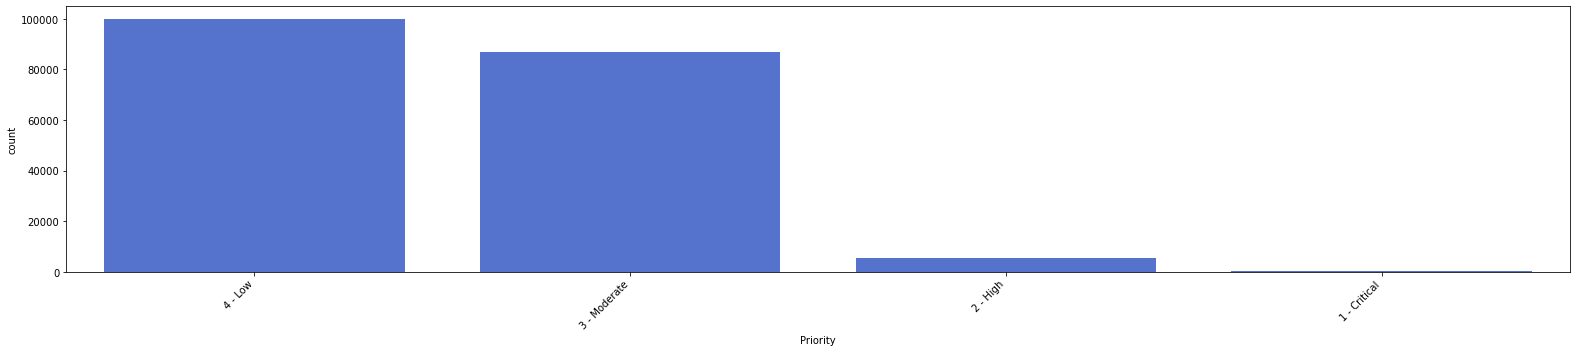

In [27]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#itTicketOthersDF = itTicketDF[itTicketDF['Assignment group'] != 'GRP_0']

descending_order = df_priority['Priority'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Priority', data=df_priority, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [25]:
maxOthers = df_priority['Priority'].value_counts().max()
maxOthers

99882

In [28]:
from sklearn.utils import resample
df_Tickets_final_resampled = df_priority[0:0]
for grp in df_priority['Priority'].unique():
    itTicketGrpDF = df_priority[df_priority['Priority'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    df_Tickets_final_resampled = df_Tickets_final_resampled.append(resampled)

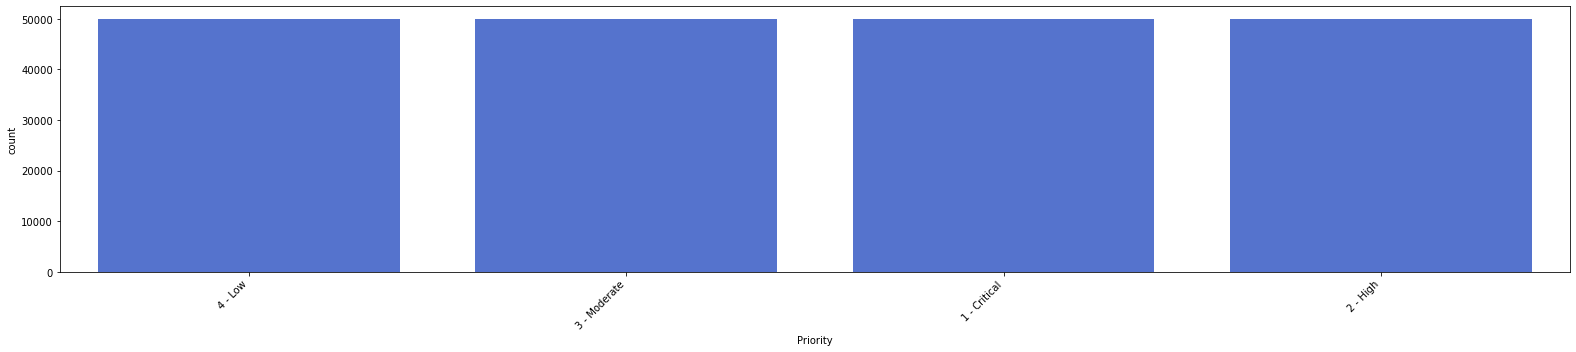

In [29]:
descending_order = df_Tickets_final_resampled['Priority'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Priority', data=df_Tickets_final_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [30]:
labelData = df_Tickets_final_resampled['Priority']
data = df_Tickets_final_resampled['finalRemovingPOStags']

In [32]:
X_train, test_data, y_train, y_test = train_test_split(
    data, labelData, test_size=0.2, random_state=123)
train_data,val_data,y_train,y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2)

In [33]:
train_data.shape

(119858,)

In [34]:
test_data.shape

(39953,)

In [35]:
val_data.shape

(39953,)

In [37]:
pipe_nb = Pipeline([('vect', count_vect),
                 ('tfidf', TfidfTransformer()),
                 ('model',  MultinomialNB(fit_prior=fit_prior))],verbose = True)

In [38]:
### Running the pipeline without hyperparameter tunnning

# List of pipelines for iterating through each of them
piplines = [pipe_nb]


In [30]:
# Creating a dict for our reference
model_dict = {0: 'Multinomial NaiveBayes'}

In [39]:
# Model fitting and train evaluation 

for idx, gs in enumerate(piplines):
    print('\nEstimator: %s' % model_dict[idx])
    gs.fit(train_data, y_train)
    #print('Best params are : %s' % gs.get_params())
    # Best training data accuracy
    #print('Training accuracy: %.3f' % gs.best_score_)
    print("validating model")
     # Score and evaluate model on test data using model without hyperparameter tuning
    predicted = gs.predict(val_data)
    prediction_acc = np.mean(predicted == val_data)
    print("Validation -- > Confusion matrix without GridSearch:")
    print(metrics.confusion_matrix(y_val, predicted))
    print("Validation Accuracy without GridSearch: " + str(prediction_acc))
    print('Validation Precision: %.3f' % precision_score(y_val, predicted,average='micro'))
    print('Validation Recall: %.3f' % recall_score(y_val, predicted,average='micro'))
    print('Validation F1 Score: %.3f' % f1_score(y_val, predicted,average='micro'))
    # Score and evaluate model on test data using model without hyperparameter tuning
    predicted = gs.predict(test_data)
    prediction_acc = np.mean(predicted == y_test)
    print("Test -- > Confusion matrix without GridSearch:")
    print(metrics.confusion_matrix(y_test, predicted))
    print("Test Accuracy without GridSearch: " + str(prediction_acc))
    print('Test Precision: %.3f' % precision_score(y_test, predicted,average='micro'))
    print('Test Recall: %.3f' % recall_score(y_test, predicted,average='micro'))
    print('Test F1 Score: %.3f' % f1_score(y_test, predicted,average='micro'))


Estimator: Multinomial NaiveBayes
[Pipeline] .............. (step 1 of 3) Processing vect, total=   2.1s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s
validating model
Validation -- > Confusion matrix without GridSearch:
[[9931    0    0    0]
 [1612 7417  250  841]
 [ 792  877 5690 2608]
 [ 474  345 1073 8043]]
Validation Accuracy without GridSearch: 0.0
Validation Precision: 0.778
Validation Recall: 0.778
Validation F1 Score: 0.778
Test -- > Confusion matrix without GridSearch:
[[10009     0     0     0]
 [ 1602  7023   293   927]
 [  835   923  5745  2537]
 [  485   345  1070  8159]]
Test Accuracy without GridSearch: 0.774309814031487
Test Precision: 0.774
Test Recall: 0.774
Test F1 Score: 0.774


In [40]:
# import joblib
from joblib import dump
# dump the pipeline model
dump(pipe_nb, filename="D:/datascience/support_ticket_classification/ticket_priority_group.joblib")

['D:/datascience/support_ticket_classification/ticket_priority_group.joblib']

#### Model Configuration 

In [113]:
df_final.isna().sum().to_frame() #Checking null values

,0
Priority,0
Assignmentgroup,0
Resolved by,47
Severity,0
ConfigurationItem,4890
Category,1008
Impact,0
Urgency,0
finalRemovingPOStags,0


In [114]:
df_config = df_final.copy()

In [115]:
df_config = df_config.dropna(subset=['ConfigurationItem'])

In [116]:
df_config.isna().sum().to_frame() #Checking null values

,0
Priority,0
Assignmentgroup,0
Resolved by,45
Severity,0
ConfigurationItem,0
Category,1008
Impact,0
Urgency,0
finalRemovingPOStags,0


In [117]:
df_config['ConfigurationItem'] = df_config['ConfigurationItem'].apply(clean_data)

<ipython-input-118-138f0637cb81>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


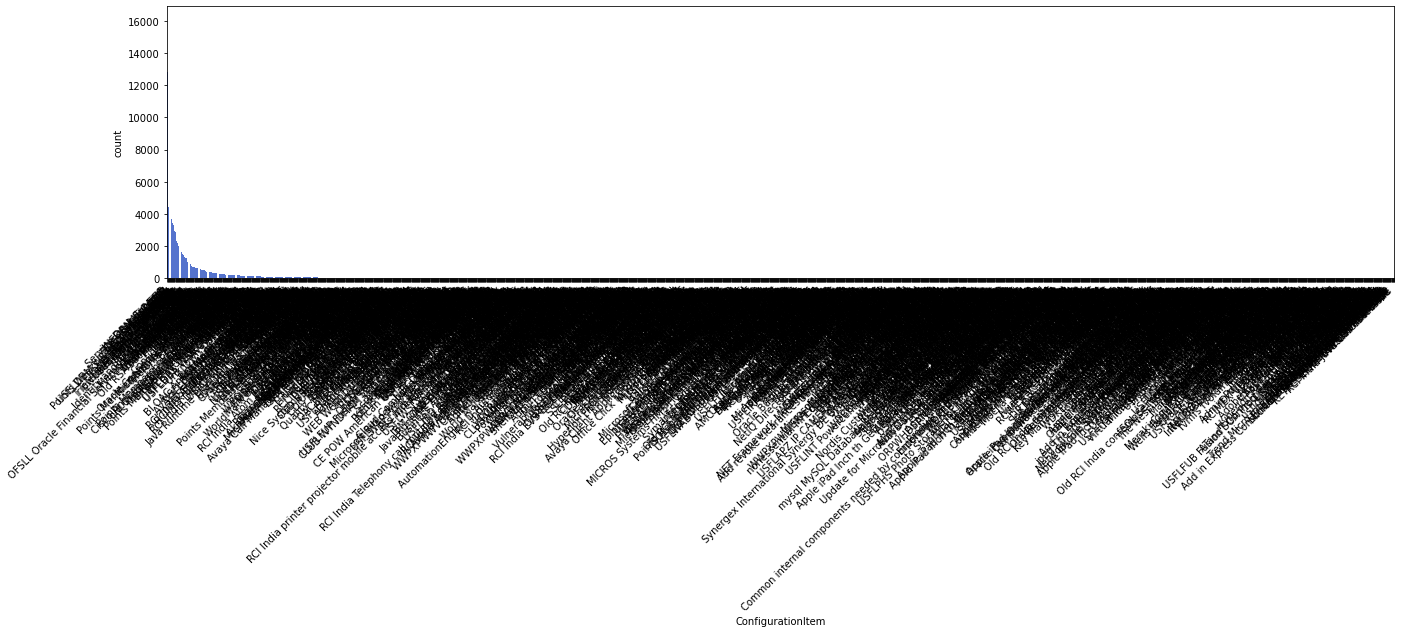

In [118]:
descending_order = df_config['ConfigurationItem'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='ConfigurationItem', data=df_config, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [119]:
maxOthers = df_config['ConfigurationItem'].value_counts().max()
maxOthers

16099

In [120]:
labelData = df_config['ConfigurationItem']
data = df_config['finalRemovingPOStags']

In [121]:
X_train, test_data, y_train, y_test = train_test_split(
    data, labelData, test_size=0.2, random_state=123)
train_data,val_data,y_train,y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2)

In [122]:
pipe_nb = Pipeline([('vect', count_vect),
                 ('tfidf', TfidfTransformer()),
                 ('model',  MultinomialNB(fit_prior=fit_prior))],verbose = True)

In [123]:
# Model fitting and train evaluation 
gs = pipe_nb
print('\nEstimator: %s' % model_dict[idx])
gs.fit(train_data, y_train)
#print('Best params are : %s' % gs.get_params())
# Best training data accuracy
#print('Training accuracy: %.3f' % gs.best_score_)
print("validating model")
 # Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(val_data)
prediction_acc = np.mean(predicted == val_data)
print("Validation -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_val, predicted))
print("Validation Accuracy without GridSearch: " + str(prediction_acc))
print('Validation Precision: %.3f' % precision_score(y_val, predicted,average='micro'))
print('Validation Recall: %.3f' % recall_score(y_val, predicted,average='micro'))
print('Validation F1 Score: %.3f' % f1_score(y_val, predicted,average='micro'))
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(test_data)
prediction_acc = np.mean(predicted == y_test)
print("Test -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_test, predicted))
print("Test Accuracy without GridSearch: " + str(prediction_acc))
print('Test Precision: %.3f' % precision_score(y_test, predicted,average='micro'))
print('Test Recall: %.3f' % recall_score(y_test, predicted,average='micro'))
print('Test F1 Score: %.3f' % f1_score(y_test, predicted,average='micro'))


Estimator: Multinomial NaiveBayes
[Pipeline] .............. (step 1 of 3) Processing vect, total=   2.1s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=   9.3s
validating model
Validation -- > Confusion matrix without GridSearch:
[[  0   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Validation Accuracy without GridSearch: 0.0
Validation Precision: 0.438
Validation Recall: 0.438
Validation F1 Score: 0.438
Test -- > Confusion matrix without GridSearch:
[[  0   0   0 ...   0   0   0]
 [  0 108   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Test Accuracy without GridSearch: 0.4312521688065558
Test Precision: 0.431
Test Recall: 0.431
Test F1 Score: 0.431


In [124]:
# import joblib
from joblib import dump
# dump the pipeline model
dump(pipe_nb, filename="D:/datascience/support_ticket_classification/ticket_config_item_group.joblib")

['D:/datascience/support_ticket_classification/ticket_config_item_group.joblib']

#### Model Category 

In [17]:
df_final.isna().sum().to_frame() #Checking null values

,0
Priority,0
Assignmentgroup,0
Resolved by,47
Severity,0
ConfigurationItem,4890
Category,1008
Impact,0
Urgency,0
finalRemovingPOStags,0


In [18]:
df_category = df_final.copy()

In [19]:
df_category = df_category.dropna(subset=['Category'])

In [20]:
df_category.isna().sum().to_frame() #Checking null values

,0
Priority,0
Assignmentgroup,0
Resolved by,47
Severity,0
ConfigurationItem,4890
Category,0
Impact,0
Urgency,0
finalRemovingPOStags,0


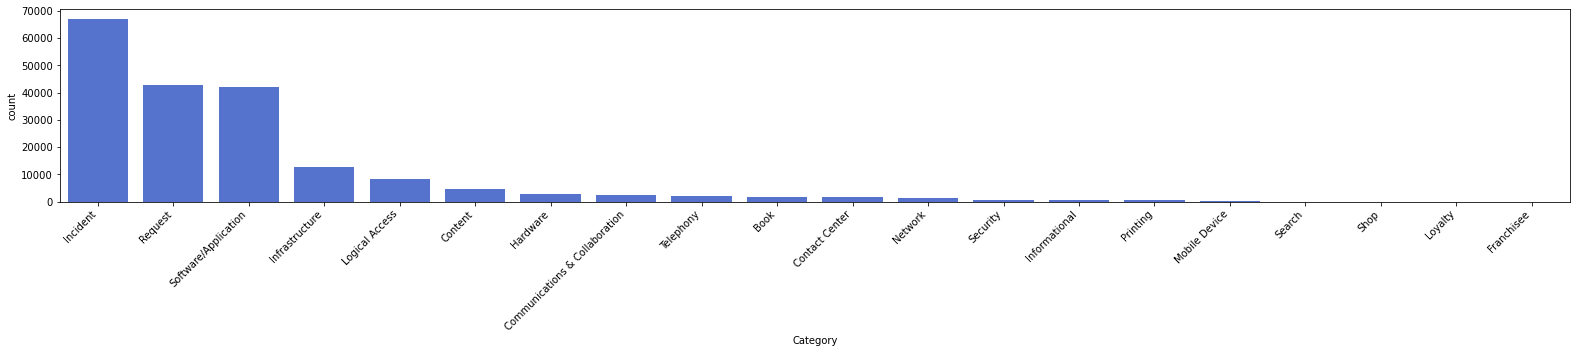

In [21]:

descending_order = df_category['Category'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Category', data=df_category, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [22]:

maxOthers = df_category['Category'].value_counts().max()
maxOthers

67157

In [23]:

from sklearn.utils import resample
df_Tickets_final_resampled = df_category[0:0]
for grp in df_category['Category'].unique():
    itTicketGrpDF = df_category[df_category['Category'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    df_Tickets_final_resampled = df_Tickets_final_resampled.append(resampled)

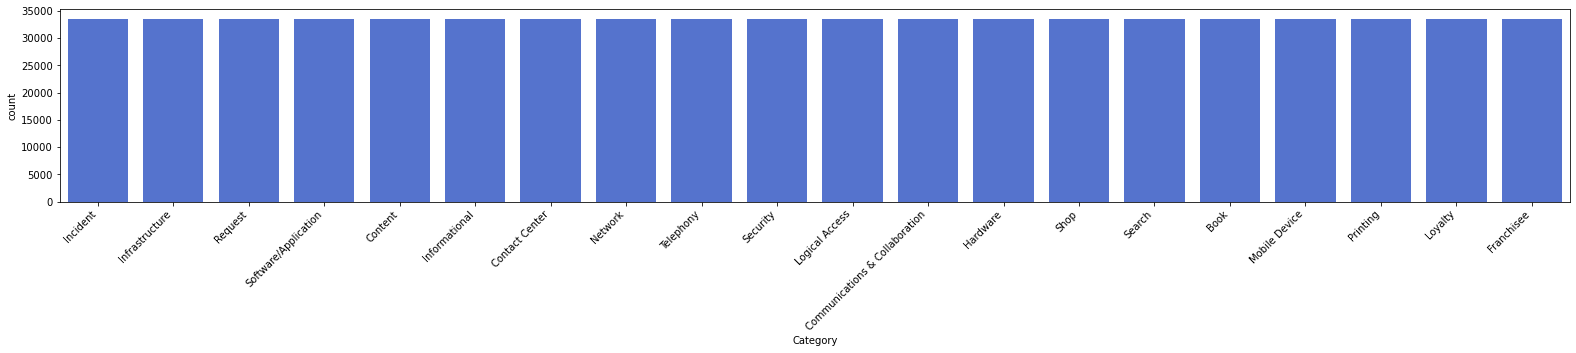

In [24]:
descending_order = df_Tickets_final_resampled['Category'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Category', data=df_Tickets_final_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [25]:
labelData = df_Tickets_final_resampled['Category']
data = df_Tickets_final_resampled['finalRemovingPOStags']

In [26]:

X_train, test_data, y_train, y_test = train_test_split(
    data, labelData, test_size=0.2, random_state=123)
train_data,val_data,y_train,y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2)

In [28]:
pipe_nb = Pipeline([('vect', count_vect),
                 ('tfidf', TfidfTransformer()),
                 ('model',  MultinomialNB(fit_prior=fit_prior))],verbose = True)

In [32]:
gs = pipe_nb
print('\nEstimator: %s' % model_dict[0])
gs.fit(train_data, y_train)
#print('Best params are : %s' % gs.get_params())
# Best training data accuracy
#print('Training accuracy: %.3f' % gs.best_score_)
print("validating model")
 # Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(val_data)
prediction_acc = np.mean(predicted == val_data)
print("Validation -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_val, predicted))
print("Validation Accuracy without GridSearch: " + str(prediction_acc))
print('Validation Precision: %.3f' % precision_score(y_val, predicted,average='micro'))
print('Validation Recall: %.3f' % recall_score(y_val, predicted,average='micro'))
print('Validation F1 Score: %.3f' % f1_score(y_val, predicted,average='micro'))
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(test_data)
prediction_acc = np.mean(predicted == y_test)
print("Test -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_test, predicted))
print("Test Accuracy without GridSearch: " + str(prediction_acc))
print('Test Precision: %.3f' % precision_score(y_test, predicted,average='micro'))
print('Test Recall: %.3f' % recall_score(y_test, predicted,average='micro'))
print('Test F1 Score: %.3f' % f1_score(y_test, predicted,average='micro'))


Estimator: Multinomial NaiveBayes
[Pipeline] .............. (step 1 of 3) Processing vect, total=   6.7s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=   1.2s
validating model
Validation -- > Confusion matrix without GridSearch:
[[5344   77   20   15   49   87   12   21   23   90   11   24  118   79
   245   56   40   36   35  199]
 [ 500 4249  174  215   35  106   28   67   43   84   54  348  235   54
    12   32  151   72  331   74]
 [ 418  432 3330  283   43  101   26   48   79  670   62  218  394   29
    22   40  126   72  214   69]
 [ 239  565  347 3630   19  182   84   59   98   95   27  175  295   43
    31   33   67   58  642   31]
 [   0    0    0    0 6755    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 632  171  210  147    2 4040   48    9  273   48   17  256  193  129
   205   14   58   15   30  245]
 [  25  158   57  292   11   61 2891  282  465   64 

In [34]:
# import joblib
from joblib import dump
# dump the pipeline model
dump(pipe_nb, filename="D:/datascience/support_ticket_classification/ticket_category_group.joblib")

['D:/datascience/support_ticket_classification/ticket_category_group.joblib']

In [35]:
from joblib import load
pipeline = load("D:/datascience/support_ticket_classification/ticket_category_group.joblib")

In [36]:
pipeline

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())],
         verbose=True)

In [ ]:
issue = ["My printer is not working "]
x = pipeline.predict(issue)
print(x)

#### Model Impact

In [147]:

df_final.isna().sum().to_frame() #Checking null values

,0
Priority,0
Assignmentgroup,0
Resolved by,47
Severity,0
ConfigurationItem,4890
Category,1008
Impact,0
Urgency,0
finalRemovingPOStags,0


In [ ]:
df_impact = df_final.copy()

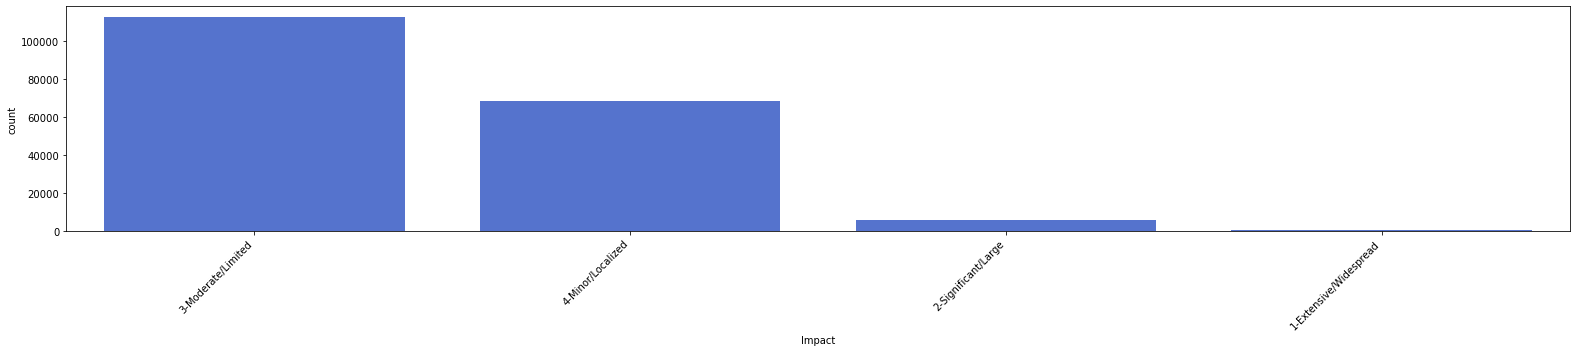

In [150]:
descending_order = df_impact['Impact'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Impact', data=df_config, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [151]:
maxOthers = df_impact['Impact'].value_counts().max()
maxOthers

116026

In [152]:
from sklearn.utils import resample
df_Tickets_final_resampled = df_impact[0:0]
for grp in df_impact['Impact'].unique():
    itTicketGrpDF = df_impact[df_impact['Impact'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    df_Tickets_final_resampled = df_Tickets_final_resampled.append(resampled)

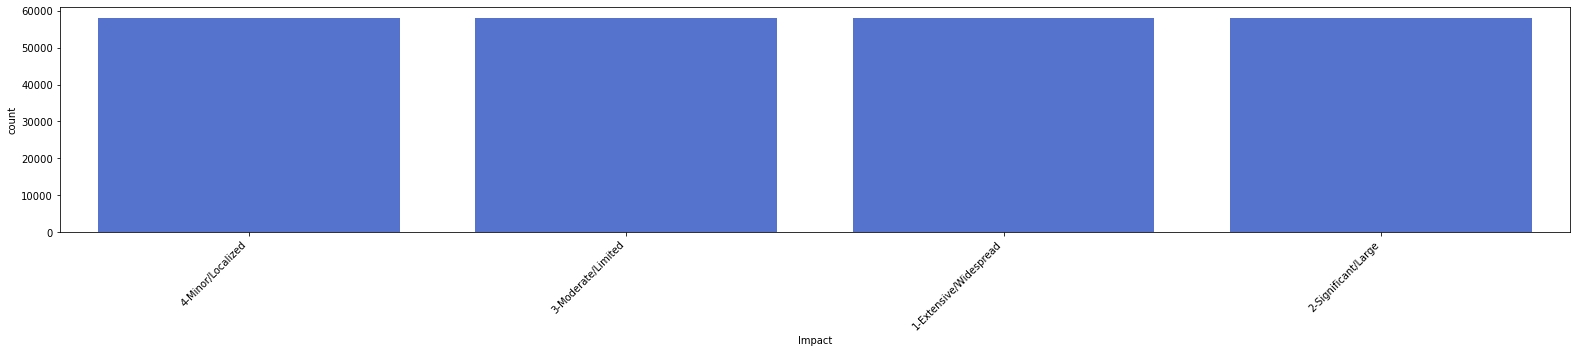

In [153]:
descending_order = df_Tickets_final_resampled['Impact'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Impact', data=df_Tickets_final_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [154]:
labelData = df_impact['Impact']
data = df_impact['finalRemovingPOStags']

In [155]:
X_train, test_data, y_train, y_test = train_test_split(
    data, labelData, test_size=0.2, random_state=123)
train_data,val_data,y_train,y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2)

In [156]:
pipe_nb = Pipeline([('vect', count_vect),
                 ('tfidf', TfidfTransformer()),
                 ('model',  MultinomialNB(fit_prior=fit_prior))],verbose = True)

In [157]:
gs = pipe_nb
print('\nEstimator: %s' % model_dict[idx])
gs.fit(train_data, y_train)
#print('Best params are : %s' % gs.get_params())
# Best training data accuracy
#print('Training accuracy: %.3f' % gs.best_score_)
print("validating model")
 # Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(val_data)
prediction_acc = np.mean(predicted == val_data)
print("Validation -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_val, predicted))
print("Validation Accuracy without GridSearch: " + str(prediction_acc))
print('Validation Precision: %.3f' % precision_score(y_val, predicted,average='micro'))
print('Validation Recall: %.3f' % recall_score(y_val, predicted,average='micro'))
print('Validation F1 Score: %.3f' % f1_score(y_val, predicted,average='micro'))
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(test_data)
prediction_acc = np.mean(predicted == y_test)
print("Test -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_test, predicted))
print("Test Accuracy without GridSearch: " + str(prediction_acc))
print('Test Precision: %.3f' % precision_score(y_test, predicted,average='micro'))
print('Test Recall: %.3f' % recall_score(y_test, predicted,average='micro'))
print('Test F1 Score: %.3f' % f1_score(y_test, predicted,average='micro'))


Estimator: Multinomial NaiveBayes
[Pipeline] .............. (step 1 of 3) Processing vect, total=   2.3s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s
validating model
Validation -- > Confusion matrix without GridSearch:
[[    0     0    77    13]
 [    0   344   741   102]
 [    0    45 20557  2655]
 [    0     1  5897  8009]]
Validation Accuracy without GridSearch: 0.0
Validation Precision: 0.752
Validation Recall: 0.752
Validation F1 Score: 0.752
Test -- > Confusion matrix without GridSearch:
[[    0     0    84     6]
 [    0   338   831    95]
 [    0    34 20485  2640]
 [    0     2  5868  8058]]
Test Accuracy without GridSearch: 0.7513071980437553
Test Precision: 0.751
Test Recall: 0.751
Test F1 Score: 0.751


In [158]:
# import joblib
from joblib import dump
# dump the pipeline model
dump(pipe_nb, filename="D:/datascience/support_ticket_classification/ticket_impact_group.joblib")

['D:/datascience/support_ticket_classification/ticket_impact_group.joblib']

#### Urgency

In [159]:
df_urgency = df_final.copy()

In [161]:
maxOthers = df_urgency['Urgency'].value_counts().max()
maxOthers

122108

In [166]:

from sklearn.utils import resample
df_Tickets_final_resampled = df_urgency[0:0]
for grp in df_urgency['Urgency'].unique():
    itTicketGrpDF = df_urgency[df_urgency['Urgency'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    df_Tickets_final_resampled = df_Tickets_final_resampled.append(resampled)

In [167]:
labelData = df_Tickets_final_resampled['Urgency']
data = df_Tickets_final_resampled['finalRemovingPOStags']

In [168]:
X_train, test_data, y_train, y_test = train_test_split(
    data, labelData, test_size=0.2, random_state=123)
train_data,val_data,y_train,y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2)

In [169]:

pipe_nb = Pipeline([('vect', count_vect),
                 ('tfidf', TfidfTransformer()),
                 ('model',  MultinomialNB(fit_prior=fit_prior))],verbose = True)

In [170]:
gs= pipe_nb
print('\nEstimator: %s' % model_dict[idx])
gs.fit(train_data, y_train)
#print('Best params are : %s' % gs.get_params())
# Best training data accuracy
#print('Training accuracy: %.3f' % gs.best_score_)
print("validating model")
 # Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(val_data)
prediction_acc = np.mean(predicted == val_data)
print("Validation -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_val, predicted))
print("Validation Accuracy without GridSearch: " + str(prediction_acc))
print('Validation Precision: %.3f' % precision_score(y_val, predicted,average='micro'))
print('Validation Recall: %.3f' % recall_score(y_val, predicted,average='micro'))
print('Validation F1 Score: %.3f' % f1_score(y_val, predicted,average='micro'))
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = gs.predict(test_data)
prediction_acc = np.mean(predicted == y_test)
print("Test -- > Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(y_test, predicted))
print("Test Accuracy without GridSearch: " + str(prediction_acc))
print('Test Precision: %.3f' % precision_score(y_test, predicted,average='micro'))
print('Test Recall: %.3f' % recall_score(y_test, predicted,average='micro'))
print('Test F1 Score: %.3f' % f1_score(y_test, predicted,average='micro'))


Estimator: Multinomial NaiveBayes
[Pipeline] .............. (step 1 of 3) Processing vect, total=   3.9s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.2s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.8s
validating model
Validation -- > Confusion matrix without GridSearch:
[[11511   382   224   148]
 [ 2557  7275   940  1531]
 [  960  1927  6798  2480]
 [ 1504  1771  1542  7293]]
Validation Accuracy without GridSearch: 0.0
Validation Precision: 0.673
Validation Recall: 0.673
Validation F1 Score: 0.673
Test -- > Confusion matrix without GridSearch:
[[11364   369   258   136]
 [ 2605  7389   830  1444]
 [  986  1990  6803  2447]
 [ 1635  1743  1491  7354]]
Test Accuracy without GridSearch: 0.6737777413807223
Test Precision: 0.674
Test Recall: 0.674
Test F1 Score: 0.674


In [171]:
# import joblib
from joblib import dump
# dump the pipeline model
dump(pipe_nb, filename="D:/datascience/support_ticket_classification/ticket_urgency_group.joblib")

['D:/datascience/support_ticket_classification/ticket_urgency_group.joblib']